<a href="https://colab.research.google.com/github/vkjadon/AI-ipynb/blob/master/15LRCatNoCatSKL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification: SKLearn Logistic Regression Model
- Will use `kaggle` dataset of cat.

In [ ]:
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Fetch Dataset from Kaggle
- Import data from Kaggle
- Use <a href="https://www.kaggle.com/muhammeddalkran/catvnoncat" target="_blank"> this Link </a>  

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

In [ ]:
!ls

sample_data


In [ ]:
!pwd

/content


In [ ]:
% cd drive/MyDrive/Colab Notebooks/AI-ipynb

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/AI-ipynb'
/content


It throw error because the drive is not accessible to the colab. For this we have to mount the drive using the `Mount Drive` icon. It will ask for the permission which we have to allow so that Colab can access the Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% cd drive/MyDrive/Colab Notebooks/AI-ipynb

/content/drive/MyDrive/Colab Notebooks/AI-ipynb


In [ ]:
# Loading the data (cat/non-cat) from the File downloaded from the Kaggle
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")

In [ ]:
for key in train_dataset.keys():
    print(key) #Names of the groups in HDF5 file.

list_classes
train_set_x
train_set_y


In [ ]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

In [ ]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(209,)


In [ ]:
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

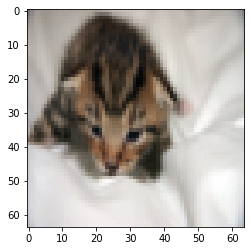

In [ ]:
index = 1
plt.imshow(test_set_x_orig[index])

The shape of **`X`** matrix is $\mathcal {(nx, m)}$ where each columns represents the features of each training set; 

Where,   

$\mathcal {nx=px * py * 3}$ for the images as input and $m$ is the training examples.



So, we have to reshape to `train_set_x_orig` to `(nx,m_train)`. This will be achieved in two steps:   

***Step-1*** : Respahe `train_set_x_orig` to `(train_set_x_orig.shape[0],-1)`. -1 is used for unknown number of columns (known presently as `nx`)   
***Step-2*** : Transpose the matrix to get the desired dimension `(nx, m)`.

In [ ]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten=test_set_x_orig.reshape (test_set_x_orig.shape[0],-1)

In [ ]:
train_set_x_flatten.shape

(209, 12288)

Optimizing the parameters is best suited on the data of the same range. Let's normalize our dataset with the maximum possible pixel value i.e. 255.

In [ ]:
X_train=train_set_x_flatten/255
y_train=train_set_y

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_set_x_flatten, train_set_y)

LogisticRegression(max_iter=1000)

In [ ]:
# Show to Coeficient and Intercept
print(lr.coef_)
print(lr.intercept_)

[[ 0.00028927 -0.00063329 -0.00023835 ... -0.00038367 -0.00060272
   0.00086182]]
[-1.91293815e-06]


In [ ]:
X_test=test_set_x_flatten/255
y_test=test_set_y

In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 0 1 1 0]


In [ ]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[13,  4],
       [10, 23]])

SKLearn Confusion matrix represnts the count on the basis of the element indices (00, 01, 10, 11). In general it can be $i,j$ where $i$ is the actual label (True/Flase) and $j$ is the predicted state (Positive/Negative)    
- 00 represnts the True Negative
- 01 represnts the Flase Positive
- 10 represnts the False Negative
- 11 represents the True Positive


So, TN=13; FP=4; FN=10; TP=11.  

Total Positive Predictions = 27;   
Total Negative Predictions = 23;  

We can count the output of the prediction array to verify the same.